##  Using Crossref API for citation metrics and publication details.

### Previously (Notebook 'B1'), we used Digital Object Identifiers (DOIs) to find citation metrics in Dimensions.ai for references reported by the BRC team in phase 2  (OxBRC2)

### Now we want to add citation counts from CrossRef to compare and importantly to gather authorship lists


In [2]:
import pandas as pd
from habanero import Crossref, cn, counts, exceptions
import time


In [3]:
%matplotlib inline

In [4]:
df_in = pd.read_csv('./B1out.csv')
df_in.columns


Index(['finaldoi_low', 'ID', 'complete', 'FinalDOI', 'api_add', 'doi',
       'times_cited', 'recent_citations', 'relative_citation_ratio',
       'field_citation_ratio', 'license'],
      dtype='object')

In [5]:
len(df_in.FinalDOI.unique())

2365

In [6]:
df_in.head(2)

,finaldoi_low,ID,complete,FinalDOI,api_add,doi,times_cited,recent_citations,relative_citation_ratio,field_citation_ratio,license
0,10.1186/s12881-014-0095-4,1125,"&amp; , fenwick al, goos jac, rankin j, lord h...",10.1186/s12881-014-0095-4,"{'doi': '10.1186/s12881-014-0095-4', 'times_ci...",10.1186/s12881-014-0095-4,7.0,4.0,0.24,0.78,This data has been sourced via the Dimensions ...
1,10.1183/13993003.00321-2016,1996,", pattinson kt, turner mr. a wider pathologica...",10.1183/13993003.00321-2016,"{'doi': '10.1183/13993003.00321-2016', 'times_...",10.1183/13993003.00321-2016,4.0,3.0,0.57,0.99,This data has been sourced via the Dimensions ...


###  Following the import of the dataframe containing the Dimensions.ai metrics data, we want to have a look at the coulmns and the head (top) of the frame.  This will allow us to correctly rename the first column as our 'FinalDOI' column and the 'times_cited' as 'Dim_times_cited'
*** 
we want to be able to refer correctly to the citation data from both Dimensions and CrossRef later

In [7]:
df_in[df_in.duplicated(subset='ID', keep=False)]

,finaldoi_low,ID,complete,FinalDOI,api_add,doi,times_cited,recent_citations,relative_citation_ratio,field_citation_ratio,license


In [8]:
# rename the 'times_cited' column to 'Dim_times_cited', to differentiate from the CrossRef citations number

df_in.columns=('finaldoi_lower', 'ID', 'complete', 'FinalDOI', 'api_add', 'doi',
       'Dim_times_cited', 'recent_citations', 'relative_citation_ratio', 'field_citation_ratio',
       'license')

In [9]:
cr = Crossref()

In [10]:
#Crossref(api_key = "168421")
# set a mailto address
Crossref(mailto = "your e-mail here")

< Crossref 
URL: https://api.crossref.org
KEY: None
MAILTO: your e-mail here
ADDITIONAL UA STRING: None
>

In [33]:
df_mini = df_in.iloc[560:570]

In [34]:
df_mini.head(2)

,finaldoi_lower,ID,complete,FinalDOI,api_add,doi,Dim_times_cited,recent_citations,relative_citation_ratio,field_citation_ratio,license
560,10.1007/s11882-014-0434-8,974,"eibel h, kraus h, sic h, kienzler ak, rizzi m....",10.1007/s11882-014-0434-8,"{'doi': '10.1007/s11882-014-0434-8', 'times_ci...",10.1007/s11882-014-0434-8,23.0,10.0,0.69,2.88,This data has been sourced via the Dimensions ...
561,10.1016/j.neuroimage.2016.12.072,2376,"eippert f, kong y, winkler am, andersson jl, f...",10.1016/j.neuroimage.2016.12.072,"{'doi': '10.1016/j.neuroimage.2016.12.072', 't...",10.1016/j.neuroimage.2016.12.072,34.0,16.0,3.04,8.41,This data has been sourced via the Dimensions ...


### And the works module (as used to get the most likely DOI from the title in earlier notebooks), can also be used to obtain specific details of the reference from the DOI, such as year and month of publication, as well as  citation count.    (... and potentially authors, try later) 

In [35]:
# an example of the full record found by DOI

cr.works(ids=df_in.FinalDOI[0])

{'status': 'ok',
 'message-type': 'work',
 'message-version': '1.0.0',
 'message': {'indexed': {'date-parts': [[2020, 3, 29]],
   'date-time': '2020-03-29T23:23:25Z',
   'timestamp': 1585524205250},
  'reference-count': 27,
  'publisher': 'Springer Science and Business Media LLC',
  'issue': '1',
  'license': [{'URL': 'http://creativecommons.org/licenses/by/4.0',
    'start': {'date-parts': [[2014, 8, 31]],
     'date-time': '2014-08-31T00:00:00Z',
     'timestamp': 1409443200000},
    'delay-in-days': 0,
    'content-version': 'unspecified'}],
  'content-domain': {'domain': ['link.springer.com'],
   'crossmark-restriction': False},
  'short-container-title': ['BMC Med Genet'],
  'published-print': {'date-parts': [[2014, 12]]},
  'DOI': '10.1186/s12881-014-0095-4',
  'type': 'journal-article',
  'created': {'date-parts': [[2014, 8, 30]],
   'date-time': '2014-08-30T14:03:56Z',
   'timestamp': 1409407436000},
  'update-policy': 'http://dx.doi.org/10.1007/springer_crossmark_policy',
  's

In [36]:
cr.works(ids=df_in.FinalDOI[1])['message']['is-referenced-by-count']

4

In [37]:
pd.Timestamp(cr.works(ids=df_in.FinalDOI[0])['message']['created']['date-time'])  # also try ['message']['issued']

Timestamp('2014-08-30 14:03:56+0000', tz='UTC')

In [38]:
cr.works(ids=df_in.FinalDOI[0])['message']['author']

[{'given': 'Aimee L',
  'family': 'Fenwick',
  'sequence': 'first',
  'affiliation': []},
 {'given': 'Jacqueline AC',
  'family': 'Goos',
  'sequence': 'additional',
  'affiliation': []},
 {'given': 'Julia',
  'family': 'Rankin',
  'sequence': 'additional',
  'affiliation': []},
 {'given': 'Helen',
  'family': 'Lord',
  'sequence': 'additional',
  'affiliation': []},
 {'given': 'Tracy',
  'family': 'Lester',
  'sequence': 'additional',
  'affiliation': []},
 {'given': 'A Jeannette M',
  'family': 'Hoogeboom',
  'sequence': 'additional',
  'affiliation': []},
 {'given': 'Ans MW',
  'family': 'van den Ouweland',
  'sequence': 'additional',
  'affiliation': []},
 {'given': 'Steven A',
  'family': 'Wall',
  'sequence': 'additional',
  'affiliation': []},
 {'given': 'Irene MJ',
  'family': 'Mathijssen',
  'sequence': 'additional',
  'affiliation': []},
 {'given': 'Andrew OM',
  'family': 'Wilkie',
  'sequence': 'additional',
  'affiliation': []}]

In [40]:
def CrossRefTimeCitesAuthors(df):
    try:
        search = cr.works(ids=df.FinalDOI)
        time.sleep(0.1)
        try:
            pub_time = pd.Timestamp(search ['message']['created']['date-time'])
        except:
            pub_time = pd.np.nan
        try:
            citations = search ['message']['is-referenced-by-count']
        except:
            citations = pd.np.nan
        try:
            authors = search ['message']['author'] 
        except:
            authors = pd.np.nan
        return pub_time, citations, authors
    except:
        return pd.np.nan, pd.np.nan, pd.np.nan
        time.sleep(0.1)
        pass






In [41]:
df_mini[['pub_date_CR_API','CR_times_cited','authors_CR']]= df_mini.apply(CrossRefTimeCitesAuthors,
                                                                          axis=1, result_type='expand')

df_mini

C:\Users\loz_r\miniconda3\envs\biblio_BRC\lib\site-packages\pandas\core\frame.py:3509: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


,finaldoi_lower,ID,complete,FinalDOI,api_add,doi,Dim_times_cited,recent_citations,relative_citation_ratio,field_citation_ratio,license,pub_date_CR_API,CR_times_cited,authors_CR
560,10.1007/s11882-014-0434-8,974,"eibel h, kraus h, sic h, kienzler ak, rizzi m....",10.1007/s11882-014-0434-8,"{'doi': '10.1007/s11882-014-0434-8', 'times_ci...",10.1007/s11882-014-0434-8,23.0,10.0,0.69,2.88,This data has been sourced via the Dimensions ...,2014-03-18 04:19:46+00:00,17,"[{'given': 'Hermann', 'family': 'Eibel', 'sequ..."
561,10.1016/j.neuroimage.2016.12.072,2376,"eippert f, kong y, winkler am, andersson jl, f...",10.1016/j.neuroimage.2016.12.072,"{'doi': '10.1016/j.neuroimage.2016.12.072', 't...",10.1016/j.neuroimage.2016.12.072,34.0,16.0,3.04,8.41,This data has been sourced via the Dimensions ...,2016-12-24 18:33:57+00:00,32,"[{'given': 'Falk', 'family': 'Eippert', 'seque..."
562,10.1111/imm.12226,938,"elias sc, choudhary p, de cassan sc, biswas s,...",10.1111/imm.12226,"{'doi': '10.1111/imm.12226', 'times_cited': 29...",10.1111/imm.12226,29.0,4.0,1.42,4.23,This data has been sourced via the Dimensions ...,2013-12-05 10:23:11+00:00,29,"[{'given': 'Sean C.', 'family': 'Elias', 'sequ..."
563,10.4049/jimmunol.1201455,323,"elias sc, collins ka, halstead fd, choudhary p...",10.4049/jimmunol.1201455,"{'doi': '10.4049/jimmunol.1201455', 'times_cit...",10.4049/jimmunol.1201455,17.0,5.0,0.59,2.34,This data has been sourced via the Dimensions ...,2013-01-05 07:24:25+00:00,17,"[{'given': 'Sean C.', 'family': 'Elias', 'sequ..."
564,10.1016/j.jcmg.2012.02.016,136,"elkhawad m, rudd jhf, sarov-blat l, cai g, wil...",10.1016/j.jcmg.2012.02.016,"{'doi': '10.1016/j.jcmg.2012.02.016', 'times_c...",10.1016/j.jcmg.2012.02.016,99.0,18.0,3.12,25.85,This data has been sourced via the Dimensions ...,2012-09-10 22:00:32+00:00,88,"[{'given': 'Maysoon', 'family': 'Elkhawad', 's..."
565,10.1097/inf.0000000000001011,1702,"ellul ma, griffiths mj, iyer a, avula s, defre...",10.1097/inf.0000000000001011,"{'doi': '10.1097/inf.0000000000001011', 'times...",10.1097/inf.0000000000001011,8.0,3.0,0.65,1.58,This data has been sourced via the Dimensions ...,2015-12-09 19:18:39+00:00,6,"[{'given': 'Mark A.', 'family': 'Ellul', 'sequ..."
566,10.1111/jicd.12088,445,"elshibly a, coulter w, millar b, prendergast b...",10.1111/jicd.12088,"{'doi': '10.1111/jicd.12088', 'times_cited': 8...",10.1111/jicd.12088,8.0,3.0,0.43,1.86,This data has been sourced via the Dimensions ...,2014-03-07 11:50:21+00:00,5,"[{'given': 'Ahmed', 'family': 'Elshibly', 'seq..."
567,10.1001/jamainternmed.2014.6924,1339,"emdin c, odutayo a, hsiao a, shakir m, hopewel...",10.1001/jamainternmed.2014.6924,"{'doi': '10.1001/jamainternmed.2014.6924', 'ti...",10.1001/jamainternmed.2014.6924,19.0,2.0,0.81,5.36,This data has been sourced via the Dimensions ...,2014-12-29 23:31:12+00:00,17,"[{'given': 'Connor', 'family': 'Emdin', 'seque..."
568,10.1136/bmj.h4865,1610,"emdin ca, anderson sg, callender t, conrad n, ...",10.1136/bmj.h4865,"{'doi': '10.1136/bmj.h4865', 'times_cited': 64...",10.1136/bmj.h4865,64.0,31.0,2.84,17.96,This data has been sourced via the Dimensions ...,2015-09-30 18:16:00+00:00,53,"[{'given': 'Connor A', 'family': 'Emdin', 'seq..."
569,10.1093/ije/dyw053,2065,"emdin ca, anderson sg, salimi-khorshidi g, woo...",10.1093/ije/dyw053,"{'doi': '10.1093/ije/dyw053', 'times_cited': 3...",10.1093/ije/dyw053,34.0,16.0,2.71,11.91,This data has been sourced via the Dimensions ...,2016-05-04 01:31:33+00:00,6,"[{'given': 'Connor A.', 'family': 'Emdin', 'se..."


In [42]:
df_in[['pub_date_CR_API','CR_times_cited','authors_CR']]= df_in.apply(CrossRefTimeCitesAuthors,
                                                                          axis=1, result_type='expand')

In [43]:
df_in.count()

finaldoi_lower             2365
ID                         2365
complete                   2365
FinalDOI                   2365
api_add                    2364
doi                        2364
Dim_times_cited            2364
recent_citations           2364
relative_citation_ratio    2303
field_citation_ratio       2259
license                    2364
pub_date_CR_API            2361
CR_times_cited             2361
authors_CR                 2359
dtype: int64

In [46]:
df_in['year'] = df_in.pub_date_CR_API.dt.year
df_in['month'] = df_in.pub_date_CR_API.dt.month

In [47]:
df_in.head()

,finaldoi_lower,ID,complete,FinalDOI,api_add,doi,Dim_times_cited,recent_citations,relative_citation_ratio,field_citation_ratio,license,pub_date_CR_API,CR_times_cited,authors_CR,year,month
0,10.1186/s12881-014-0095-4,1125,"&amp; , fenwick al, goos jac, rankin j, lord h...",10.1186/s12881-014-0095-4,"{'doi': '10.1186/s12881-014-0095-4', 'times_ci...",10.1186/s12881-014-0095-4,7.0,4.0,0.24,0.78,This data has been sourced via the Dimensions ...,2014-08-30 14:03:56+00:00,5.0,"[{'given': 'Aimee L', 'family': 'Fenwick', 'se...",2014.0,8.0
1,10.1183/13993003.00321-2016,1996,", pattinson kt, turner mr. a wider pathologica...",10.1183/13993003.00321-2016,"{'doi': '10.1183/13993003.00321-2016', 'times_...",10.1183/13993003.00321-2016,4.0,3.0,0.57,0.99,This data has been sourced via the Dimensions ...,2016-06-01 01:53:39+00:00,4.0,"[{'given': 'Kyle T.S.', 'family': 'Pattinson',...",2016.0,6.0
2,10.1161/strokeaha.113.679936,506,"adib-samii p, rost n, traylor m, devan w, ...",10.1161/strokeaha.113.679936,"{'doi': '10.1161/strokeaha.113.679936', 'times...",10.1161/strokeaha.113.679936,37.0,4.0,1.37,8.71,This data has been sourced via the Dimensions ...,2013-05-15 04:36:29+00:00,34.0,"[{'given': 'Poneh', 'family': 'Adib-Samii', 's...",2013.0,5.0
3,10.1093/annonc/mdu449,1430,"and i. tomlinson*, findlay jm, middleton mr, t...",10.1093/annonc/mdu449,"{'doi': '10.1093/annonc/mdu449', 'times_cited'...",10.1093/annonc/mdu449,44.0,8.0,2.29,8.63,This data has been sourced via the Dimensions ...,2014-09-12 00:32:37+00:00,33.0,"[{'given': 'J.M.', 'family': 'Findlay', 'seque...",2014.0,9.0
4,10.1161/strokeaha.113.002707,848,"dichgans m, malik r, kã•_nig ir, rosand j, ...",10.1161/strokeaha.113.002707,"{'doi': '10.1161/strokeaha.113.002707', 'times...",10.1161/strokeaha.113.002707,230.0,62.0,8.70,54.15,This data has been sourced via the Dimensions ...,2013-11-22 05:07:47+00:00,213.0,"[{'given': 'Martin', 'family': 'Dichgans', 'se...",2013.0,11.0


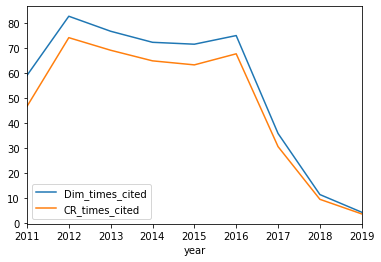

In [48]:
df_in.groupby(['year'])['Dim_times_cited','CR_times_cited'].mean().plot()

In [49]:
df_noCR=df_in[df_in.CR_times_cited.isna()]
df_noCR.shape

(4, 16)

##  Finally, we want get a count of the number of authors in the publication
### and we can do this from the author data that we aquired from CrossRef 
</br>

By using the type() command we can confirm the first entry in the column 'authors_CR' is a list
putting this in a DataFrame would allow use to see the entries for each author, but all we need to know for now\
is how many authors are there? For this a length 'len(list in question)' will return the number of items.

In [50]:
type(df_in.authors_CR[0])

#pd.DataFrame(df_in.authors_CR[0])
#len(df_in.authors_CR[0])

list

In [51]:
def AuthCount(df):
    try:
        author_count = len(df.authors_CR)
    except:
        author_count = None
    return author_count

In [52]:
DOI_auth_count = df_in.assign(auth_number = df_in.apply(AuthCount, axis=1))
DOI_auth_count.head()

,finaldoi_lower,ID,complete,FinalDOI,api_add,doi,Dim_times_cited,recent_citations,relative_citation_ratio,field_citation_ratio,license,pub_date_CR_API,CR_times_cited,authors_CR,year,month,auth_number
0,10.1186/s12881-014-0095-4,1125,"&amp; , fenwick al, goos jac, rankin j, lord h...",10.1186/s12881-014-0095-4,"{'doi': '10.1186/s12881-014-0095-4', 'times_ci...",10.1186/s12881-014-0095-4,7.0,4.0,0.24,0.78,This data has been sourced via the Dimensions ...,2014-08-30 14:03:56+00:00,5.0,"[{'given': 'Aimee L', 'family': 'Fenwick', 'se...",2014.0,8.0,10.0
1,10.1183/13993003.00321-2016,1996,", pattinson kt, turner mr. a wider pathologica...",10.1183/13993003.00321-2016,"{'doi': '10.1183/13993003.00321-2016', 'times_...",10.1183/13993003.00321-2016,4.0,3.0,0.57,0.99,This data has been sourced via the Dimensions ...,2016-06-01 01:53:39+00:00,4.0,"[{'given': 'Kyle T.S.', 'family': 'Pattinson',...",2016.0,6.0,2.0
2,10.1161/strokeaha.113.679936,506,"adib-samii p, rost n, traylor m, devan w, ...",10.1161/strokeaha.113.679936,"{'doi': '10.1161/strokeaha.113.679936', 'times...",10.1161/strokeaha.113.679936,37.0,4.0,1.37,8.71,This data has been sourced via the Dimensions ...,2013-05-15 04:36:29+00:00,34.0,"[{'given': 'Poneh', 'family': 'Adib-Samii', 's...",2013.0,5.0,47.0
3,10.1093/annonc/mdu449,1430,"and i. tomlinson*, findlay jm, middleton mr, t...",10.1093/annonc/mdu449,"{'doi': '10.1093/annonc/mdu449', 'times_cited'...",10.1093/annonc/mdu449,44.0,8.0,2.29,8.63,This data has been sourced via the Dimensions ...,2014-09-12 00:32:37+00:00,33.0,"[{'given': 'J.M.', 'family': 'Findlay', 'seque...",2014.0,9.0,3.0
4,10.1161/strokeaha.113.002707,848,"dichgans m, malik r, kã•_nig ir, rosand j, ...",10.1161/strokeaha.113.002707,"{'doi': '10.1161/strokeaha.113.002707', 'times...",10.1161/strokeaha.113.002707,230.0,62.0,8.70,54.15,This data has been sourced via the Dimensions ...,2013-11-22 05:07:47+00:00,213.0,"[{'given': 'Martin', 'family': 'Dichgans', 'se...",2013.0,11.0,58.0


In [53]:
DOI_auth_count.finaldoi_lower.value_counts()

10.1093/humrep/des219                1
10.1016/j.anndiagpath.2013.04.001    1
10.1111/acps.12373                   1
10.1186/s12968-015-0174-5            1
10.3402/qhw.v9.22252                 1
                                    ..
10.1128/jvi.02793-12                 1
10.1370/afm.1845                     1
10.1038/ng.2480                      1
10.1111/ijcp.12485                   1
10.2337/db15-1489                    1
Name: finaldoi_lower, Length: 2365, dtype: int64

In [54]:
DOI_auth_count.to_csv('./C1in.csv')
DOI_auth_count.to_json('./C1in.json')

In [55]:
DOI_auth_count.auth_number.describe(percentiles=[0.1,0.9])

count    2359.000000
mean       18.029674
std        65.342011
min         1.000000
10%         3.000000
50%         9.000000
90%        27.000000
max      2467.000000
Name: auth_number, dtype: float64